In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))
import sys
sys.path.append('/home/chenani/ownCloud/Workspaces/Eclipse/dataAnalysis/Sleep-current/src/')

In [2]:
%matplotlib inline
print(__doc__)
import seaborn as sns
import numpy as np
import matplotlib.pyplot as pl
import pandas as pd
import cPickle as pkl
import statsmodels.api as sm
from signale.tools import locate
from os import path
from scipy.stats import binom,ranksums,wilcoxon,ks_2samp

/home/chenani/anaconda/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)
/home/chenani/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:1350: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


Automatically created module for IPython interactive environment


In [3]:
sns.set_style('white')
sns.set_context("poster",font_scale=1.7)
colors = ["windows blue", "amber", "greyish", "faded green", "dusty purple"]
seabC = sns.xkcd_palette(colors)

In [4]:
fgRipp_percentiles = pd.read_pickle('/home/chenani/ownCloud/IpythonNotebooks/Sleep/MEC_Lesion_Project/files/RippPercentileDF.db')
fg10th = fgRipp_percentiles.copy()
fg10th.SWR_prcnt /=20.0
lesFolder = '/home/chenani/ownCloud/IpythonNotebooks/Sleep/MEC_Lesion_Project/lesion/'
cntFolder = '/home/chenani/ownCloud/IpythonNotebooks/Sleep/MEC_Lesion_Project/control/'
lesListPlus_pre = sorted([path.join(item[0],item[1]) for item in locate('*4plus-PRE.npArr',lesFolder)])
lesListPlus_post = sorted([path.join(item[0],item[1]) for item in locate('*4plus-POST.npArr',lesFolder)])
cntListPlus_pre = sorted([path.join(item[0],item[1]) for item in locate('*4plus-PRE.npArr',cntFolder)])
cntListPlus_post = sorted([path.join(item[0],item[1]) for item in locate('*4plus-POST.npArr',cntFolder)])
#########################
lesListMinus = sorted([path.join(item[0],item[1]) for item in locate('*4minus-PRE.npArr',lesFolder)])
cntListMinus = sorted([path.join(item[0],item[1]) for item in locate('*4minus-PRE.npArr',cntFolder)])
#########################
lesListSig_pre = sorted([path.join(item[0],item[1]) for item in locate('*PRE-sig.npArr',lesFolder)])
lesListSig_post = sorted([path.join(item[0],item[1]) for item in locate('*POST-sig.npArr',lesFolder)])
cntListSig_pre = sorted([path.join(item[0],item[1]) for item in locate('*PRE-sig.npArr',cntFolder)])
cntListSig_post= sorted([path.join(item[0],item[1]) for item in locate('*POST-sig.npArr',cntFolder)])
lesListSig_post

['/home/chenani/ownCloud/IpythonNotebooks/Sleep/MEC_Lesion_Project/lesion/Rat3754Lesion/dataFiles/sleepDB/3754-diffList-POST-sig.npArr',
 '/home/chenani/ownCloud/IpythonNotebooks/Sleep/MEC_Lesion_Project/lesion/Rat3837Lesion/dataFiles/sleepDB/3837-diffList-POST-sig.npArr',
 '/home/chenani/ownCloud/IpythonNotebooks/Sleep/MEC_Lesion_Project/lesion/Rat3838Lesion/dataFiles/sleepDB/3838-diffList-POST-sig.npArr',
 '/home/chenani/ownCloud/IpythonNotebooks/Sleep/MEC_Lesion_Project/lesion/Rat3903Lesion/dataFiles/sleepDB/3903-diffList-POST-sig.npArr',
 '/home/chenani/ownCloud/IpythonNotebooks/Sleep/MEC_Lesion_Project/lesion/Rat405Lesion/dataFiles/sleepDB/405-diffList-POST-sig.npArr',
 '/home/chenani/ownCloud/IpythonNotebooks/Sleep/MEC_Lesion_Project/lesion/Rat434Lesion/dataFiles/sleepDB/434-diffList-POST-sig.npArr']

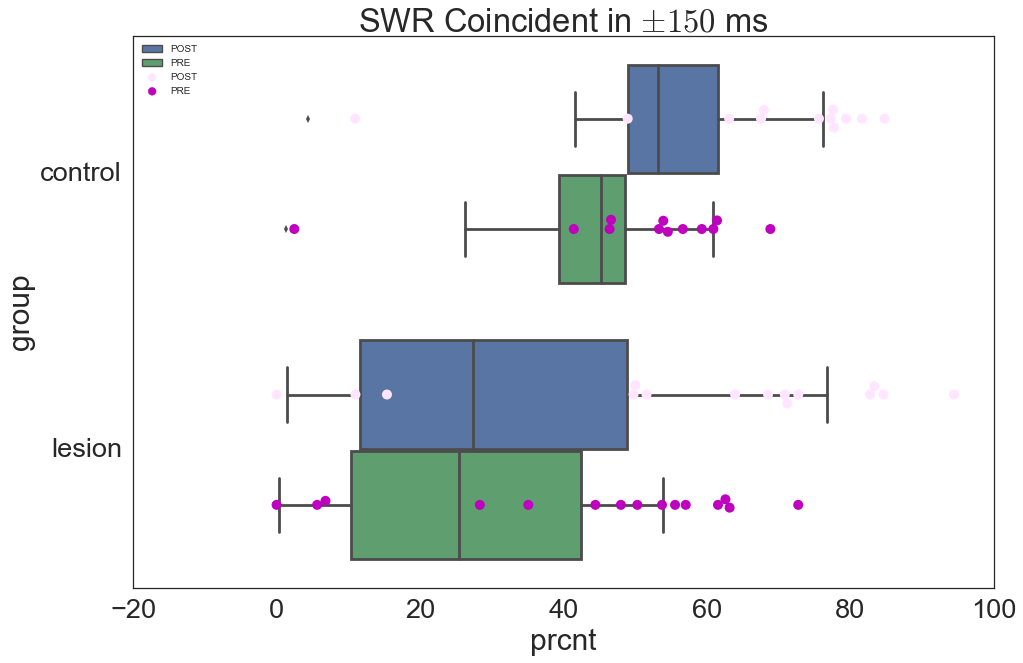

In [5]:
swrPrcnt = pd.DataFrame([],columns=['prcnt','group','session'])
lst = [cntListPlus_pre,cntListPlus_post,lesListPlus_pre,lesListPlus_post]
sess = ['PRE','POST','PRE','POST']
grp  = ['control','control','lesion','lesion'] 
for idx,pthLst in enumerate(lst):
    for ccFile in pthLst:
        dayList = pkl.load(open(ccFile,'rb'))
        for dic in dayList:
            swrs = dic['swr']
            fgbs = dic['fgb']
            if swrs.size+fgbs.size:
                swrPrcnt = swrPrcnt.append(pd.DataFrame([[1e2*swrs.size/(fgbs.size+swrs.size),grp[idx],sess[idx]]],columns=['prcnt','group','session']),ignore_index=True)

####################
f,ax= pl.subplots(1,1,figsize=[15,10])
#sns.violinplot(x='SWR_prcnt',y='group',data=fgRipp_percentiles,inner=None,split=True,hue='session',orient='h',order=['control','lesion'],hue_order=['POST','PRE'],alpha=0.5,ax=ax)
sns.boxplot(x='SWR_prcnt',y='group',data=fgRipp_percentiles,hue='session',orient='h',order=['control','lesion'],hue_order=['POST','PRE'],ax=ax)
sns.swarmplot(y='group',x='prcnt',data=swrPrcnt,split=True,hue='session',size=10,orient='h',order=['control','lesion'],hue_order=['POST','PRE'],color='m');
ax.legend(fontsize=10,loc=2)#bbox_to_anchor=(1.4, 0.5))
#pl.yticks([0,50,100])
ax.set_title('SWR Coincident in $\pm 150$ ms')
pl.tight_layout()
f.savefig('/home/chenani/ownCloud/Plots/Lesion-Project/SWR-Coincidence-percentile.pdf')

In [6]:
dayList

[{'Nfgb': 1092.3900402328832,
  'NfgbD': 546.95520840375946,
  'NfgbT': 935.88140274289026,
  'Nhfe': 1590.9827151795207,
  'Nswr': 1156.6805954973049,
  'NswrD': 586.54411598787692,
  'NswrT': 975.01999979487596,
  'fgb': array([-0.01763039, -0.10701172, -0.01416282, -0.14919395, -0.10078181,
          0.01666572,  0.00583582, -0.12038468,  0.01235868, -0.10767814,
         -0.12271705,  0.10239228,  0.14160246,  0.01060246,  0.01481794,
          0.03796106,  0.02328082, -0.00392206,  0.00229507,  0.01422663,
         -0.04575146,  0.08695841,  0.07596444,  0.00504075,  0.07620813,
          0.01852217,  0.14238998, -0.09461002, -0.00477358,  0.0052386 ,
          0.11316588, -0.00683412,  0.10624356,  0.01560208,  0.08133387,
         -0.00350024, -0.07970918,  0.01005556,  0.14126203, -0.00573797,
          0.00852921,  0.07008093, -0.01391907, -0.0749982 , -0.10267673,
          0.10564195, -0.1284326 ,  0.00610342, -0.00459434, -0.09859434,
          0.1136229 ,  0.06930175,  0.0

In [88]:
a = swrPrcnt[(swrPrcnt.group=='lesion')&(swrPrcnt.session=='PRE')].prcnt.as_matrix()
aa = swrPrcnt[(swrPrcnt.group=='lesion')&(swrPrcnt.session=='POST')].prcnt.as_matrix()
b = swrPrcnt[(swrPrcnt.group=='control')&(swrPrcnt.session=='PRE')].prcnt.as_matrix()
bb = swrPrcnt[(swrPrcnt.group=='control')&(swrPrcnt.session=='POST')].prcnt.as_matrix()
print ranksums(a,aa),ks_2samp(a,aa)
print ranksums(b,bb),ks_2samp(b,bb)
print ranksums(bb,aa),ks_2samp(bb,aa)
print ranksums(b,a),ks_2samp(b,a)

RanksumsResult(statistic=-1.9287301521985911, pvalue=0.053764370975060816) Ks_2sampResult(statistic=0.53333333333333333, pvalue=0.016786481071967625)
RanksumsResult(statistic=-2.8867513459481287, pvalue=0.003892417122778628) Ks_2sampResult(statistic=0.75, pvalue=0.00091525414760188016)
RanksumsResult(statistic=0.68313005106397329, pvalue=0.49452466788387051) Ks_2sampResult(statistic=0.3166666666666666, pvalue=0.43674589692043692)
RanksumsResult(statistic=0.53674504012169322, pvalue=0.5914437399020237) Ks_2sampResult(statistic=0.25, pvalue=0.73415439798065518)


array([-16.68870691, -16.33619634, -20.62907691,  -8.48976831,
       -38.14030888,   5.59587471, -21.66252629, -14.63546494,
       -13.62560099, -17.9847891 , -12.77377007, -31.2606716 ])

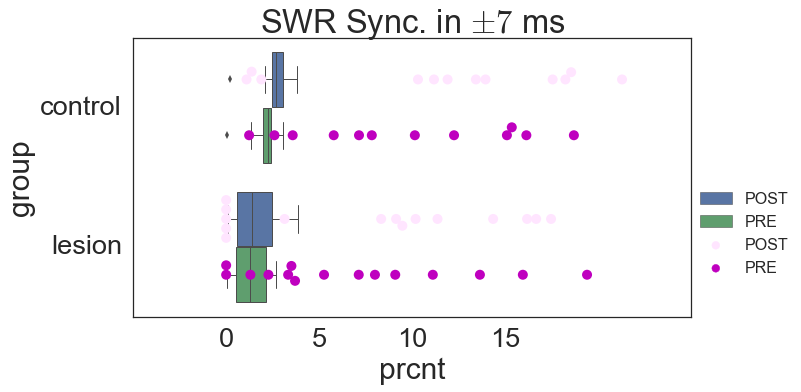

In [120]:
syncPrcnt = pd.DataFrame([],columns=['prcnt','session','group','event'])
syncLag = 0.0075
lst = [cntListPlus_pre,cntListPlus_post,lesListPlus_pre,lesListPlus_post]
sess = ['PRE','POST','PRE','POST']
grp  = ['control','control','lesion','lesion'] 
for idx,pthLst in enumerate(lst):
    for ccFile in pthLst:
        dayList = pkl.load(open(ccFile,'rb'))
        for dic in dayList:
            swrs = dic['swr']
            fgbs = dic['fgb']
            syncSWR = swrs[np.abs(swrs)<syncLag]
            syncFGB = fgbs[np.abs(fgbs)<syncLag]
            if swrs.size+fgbs.size:
                syncPrcnt = syncPrcnt.append(pd.DataFrame([[1e2*syncSWR.size/(fgbs.size+swrs.size),sess[idx],grp[idx],'SWR']],columns=['prcnt','session','group','event']),ignore_index=True)
                syncPrcnt = syncPrcnt.append(pd.DataFrame([[1e2*syncFGB.size/(fgbs.size+swrs.size),sess[idx],grp[idx],'FGB']],columns=['prcnt','session','group','event']),ignore_index=True)
'''
for ccFile in cntListPlus:
    dayList = pkl.load(open(ccFile,'rb'))
    for dic in dayList:
        swrs = dic['swr']
        fgbs = dic['fgb']
        syncSWR = swrs[np.abs(swrs)<syncLag]
        syncFGB = fgbs[np.abs(fgbs)<syncLag]
        syncPrcnt = syncPrcnt.append(pd.DataFrame([[1e2*syncSWR.size/(fgbs.size+swrs.size),'control','SWR']],columns=['prcnt','group','event']),ignore_index=True)
        syncPrcnt = syncPrcnt.append(pd.DataFrame([[1e2*syncFGB.size/(fgbs.size+swrs.size),'control','FGB']],columns=['prcnt','group','event']),ignore_index=True)
        '''
####################
f,ax = pl.subplots(1,1,figsize=[10,5])
#sns.violinplot(x='group',y='prcnt',data=syncPrcnt,inner='stick',split=True,hue='event',order=['control','lesion'])
sns.boxplot(x='SWR_prcnt',y='group',data=fg10th,hue='session',orient='h',linewidth=1,order=['control','lesion'],hue_order=['POST','PRE'],ax=ax)
sns.swarmplot(y='group',x='prcnt',data=syncPrcnt[syncPrcnt.event=='SWR'],split=True,hue='session',size=10,order=['control','lesion'],hue_order=['POST','PRE'],color='m')
ax.set_title('SWR Sync. in $\pm 7$ ms')
ax.legend(fontsize=16,bbox_to_anchor=(1.2, 0.5))
pl.xticks([0,5,10,15])
f.savefig('/home/chenani/ownCloud/Plots/Lesion-Project/SWR-Syncronized-percentile-All.pdf')

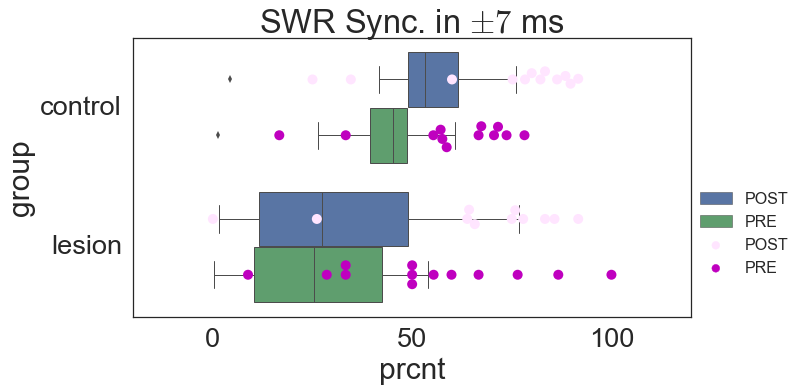

In [118]:
syncPrcnt = pd.DataFrame([],columns=['prcnt','session','group','event'])
syncLag = 0.0075
lst = [cntListPlus_pre,cntListPlus_post,lesListPlus_pre,lesListPlus_post]
sess = ['PRE','POST','PRE','POST']
grp  = ['control','control','lesion','lesion'] 
for idx,pthLst in enumerate(lst):
    for ccFile in pthLst:
        dayList = pkl.load(open(ccFile,'rb'))
        for dic in dayList:
            swrs = dic['swr']
            fgbs = dic['fgb']
            syncSWR = swrs[np.abs(swrs)<syncLag]
            syncFGB = fgbs[np.abs(fgbs)<syncLag]
            if syncFGB.size+syncSWR.size:
                syncPrcnt = syncPrcnt.append(pd.DataFrame([[1e2*syncSWR.size/(syncFGB.size+syncSWR.size),sess[idx],grp[idx],'SWR']],columns=['prcnt','session','group','event']),ignore_index=True)
                syncPrcnt = syncPrcnt.append(pd.DataFrame([[1e2*syncFGB.size/(syncFGB.size+syncSWR.size),sess[idx],grp[idx],'FGB']],columns=['prcnt','session','group','event']),ignore_index=True)
'''
for ccFile in cntListPlus:
    dayList = pkl.load(open(ccFile,'rb'))
    for dic in dayList:
        swrs = dic['swr']
        fgbs = dic['fgb']
        syncSWR = swrs[np.abs(swrs)<syncLag]
        syncFGB = fgbs[np.abs(fgbs)<syncLag]
        syncPrcnt = syncPrcnt.append(pd.DataFrame([[1e2*syncSWR.size/(fgbs.size+swrs.size),'control','SWR']],columns=['prcnt','group','event']),ignore_index=True)
        syncPrcnt = syncPrcnt.append(pd.DataFrame([[1e2*syncFGB.size/(fgbs.size+swrs.size),'control','FGB']],columns=['prcnt','group','event']),ignore_index=True)
        '''
####################
f,ax = pl.subplots(1,1,figsize=[10,5])
#sns.violinplot(x='group',y='prcnt',data=syncPrcnt,inner='stick',split=True,hue='event',order=['control','lesion'])
sns.boxplot(x='SWR_prcnt',y='group',data=fgRipp_percentiles,hue='session',orient='h',linewidth=1,order=['control','lesion'],hue_order=['POST','PRE'],ax=ax)
sns.swarmplot(y='group',x='prcnt',data=syncPrcnt[syncPrcnt.event=='SWR'],split=True,hue='session',size=10,order=['control','lesion'],hue_order=['POST','PRE'],color='m')
ax.set_title('SWR Sync. in $\pm 7$ ms')
ax.legend(fontsize=16,bbox_to_anchor=(1.2, 0.5))
pl.xticks([0,50,100])
f.savefig('/home/chenani/ownCloud/Plots/Lesion-Project/SWR-Syncronized-percentile.pdf')

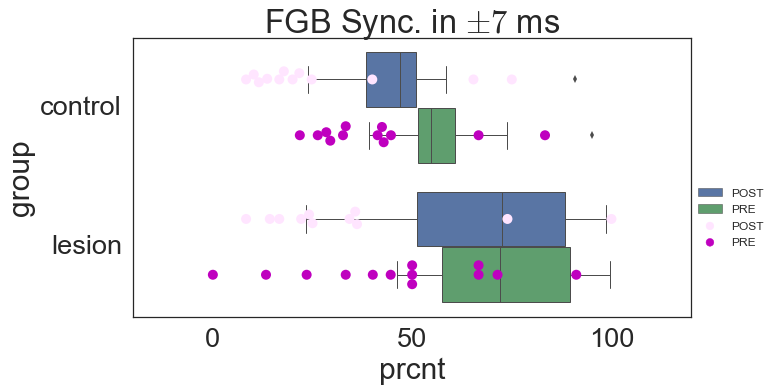

In [121]:
syncPrcnt = pd.DataFrame([],columns=['prcnt','session','group','event'])
syncLag = 0.0075
lst = [cntListPlus_pre,cntListPlus_post,lesListPlus_pre,lesListPlus_post]
sess = ['PRE','POST','PRE','POST']
grp  = ['control','control','lesion','lesion'] 
for idx,pthLst in enumerate(lst):
    for ccFile in pthLst:
        dayList = pkl.load(open(ccFile,'rb'))
        for dic in dayList:
            swrs = dic['swr']
            fgbs = dic['fgb']
            syncSWR = swrs[np.abs(swrs)<syncLag]
            syncFGB = fgbs[np.abs(fgbs)<syncLag]
            if syncFGB.size+syncSWR.size:
                syncPrcnt = syncPrcnt.append(pd.DataFrame([[1e2*syncSWR.size/(syncFGB.size+syncSWR.size),sess[idx],grp[idx],'SWR']],columns=['prcnt','session','group','event']),ignore_index=True)
                syncPrcnt = syncPrcnt.append(pd.DataFrame([[1e2*syncFGB.size/(syncFGB.size+syncSWR.size),sess[idx],grp[idx],'FGB']],columns=['prcnt','session','group','event']),ignore_index=True)
'''
for ccFile in cntListPlus:
    dayList = pkl.load(open(ccFile,'rb'))
    for dic in dayList:
        swrs = dic['swr']
        fgbs = dic['fgb']
        syncSWR = swrs[np.abs(swrs)<syncLag]
        syncFGB = fgbs[np.abs(fgbs)<syncLag]
        syncPrcnt = syncPrcnt.append(pd.DataFrame([[1e2*syncSWR.size/(fgbs.size+swrs.size),'control','SWR']],columns=['prcnt','group','event']),ignore_index=True)
        syncPrcnt = syncPrcnt.append(pd.DataFrame([[1e2*syncFGB.size/(fgbs.size+swrs.size),'control','FGB']],columns=['prcnt','group','event']),ignore_index=True)
        '''
####################
f,ax = pl.subplots(1,1,figsize=[10,5])
#sns.violinplot(x='group',y='prcnt',data=syncPrcnt,inner='stick',split=True,hue='event',order=['control','lesion'])
sns.boxplot(x='FG_prcnt',y='group',data=fgRipp_percentiles,hue='session',orient='h',linewidth=1,order=['control','lesion'],hue_order=['POST','PRE'],ax=ax)
sns.swarmplot(y='group',x='prcnt',data=syncPrcnt[syncPrcnt.event=='FGB'],split=True,hue='session',size=10,order=['control','lesion'],hue_order=['POST','PRE'],color='m')
#ax.axvline(5,linewidth=1,color='r')
ax.legend(fontsize=12,bbox_to_anchor=(1.15, 0.5))
ax.set_title('FGB Sync. in $\pm 7$ ms')
pl.xticks([0,50,100])
f.savefig('/home/chenani/ownCloud/Plots/Lesion-Project/FGB-Syncronized-percentile.pdf')

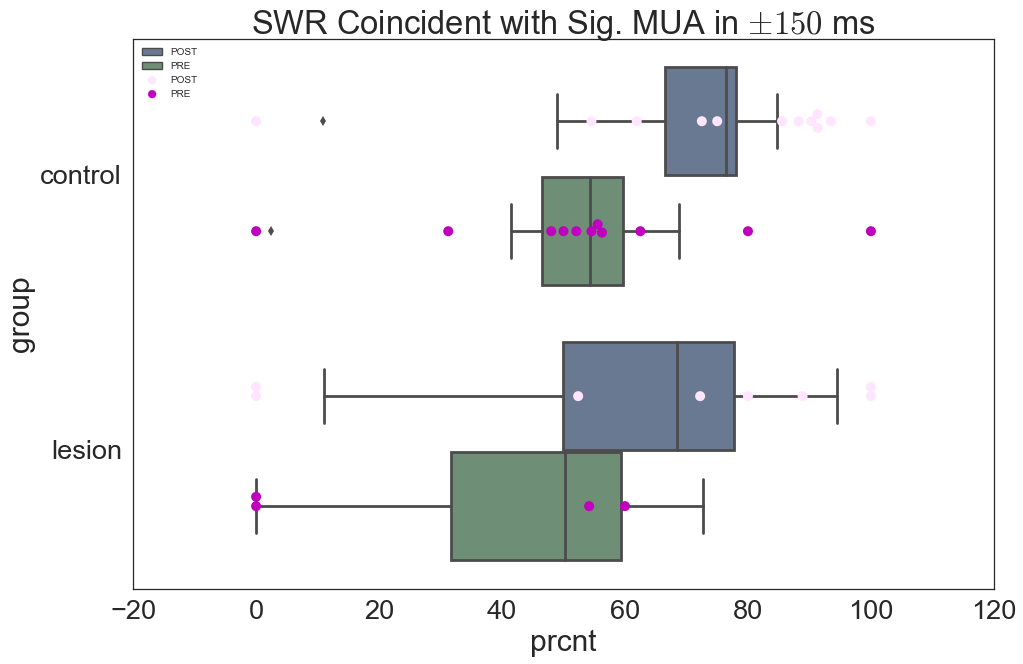

In [156]:
swrPrcntSig = pd.DataFrame([],columns=['prcnt','group','session'])
lst = [cntListSig_pre,cntListSig_post,lesListSig_pre,lesListSig_post]
sess = ['PRE','POST','PRE','POST']
grp  = ['control','control','lesion','lesion'] 
for idx,pthLst in enumerate(lst):
    for ccFile in pthLst:
        dayList = pkl.load(open(ccFile,'rb'))
        for dic in dayList:
            swrs = dic['swr']
            fgbs = dic['fgb']
            if swrs.size+fgbs.size:
                #print swrs.size
                swrPrcntSig = swrPrcntSig.append(pd.DataFrame([[1e2*swrs.size/(fgbs.size+swrs.size),grp[idx],sess[idx]]],columns=['prcnt','group','session']),ignore_index=True)

####################
f,ax= pl.subplots(1,1,figsize=[15,10])
#sns.violinplot(x='SWR_prcnt',y='group',data=fgRipp_percentiles,inner=None,split=True,hue='session',orient='h',order=['control','lesion'],hue_order=['POST','PRE'],alpha=0.5,ax=ax)
sns.boxplot(x='prcnt',y='group',data=swrPrcnt,hue='session',orient='h',order=['control','lesion'],hue_order=['POST','PRE'],saturation=0.4,fliersize=7,ax=ax)
sns.swarmplot(y='group',x='prcnt',data=swrPrcntSig,split=True,hue='session',size=10,orient='h',order=['control','lesion'],hue_order=['POST','PRE'],color='m');
ax.legend(fontsize=10,loc=2)#bbox_to_anchor=(1.4, 0.5))
#pl.yticks([0,50,100])
ax.set_title('SWR Coincident with Sig. MUA in $\pm 150$ ms')
pl.tight_layout()
f.savefig('/home/chenani/ownCloud/Plots/Lesion-Project/significant-SWR-Coincidence-percentile.pdf')

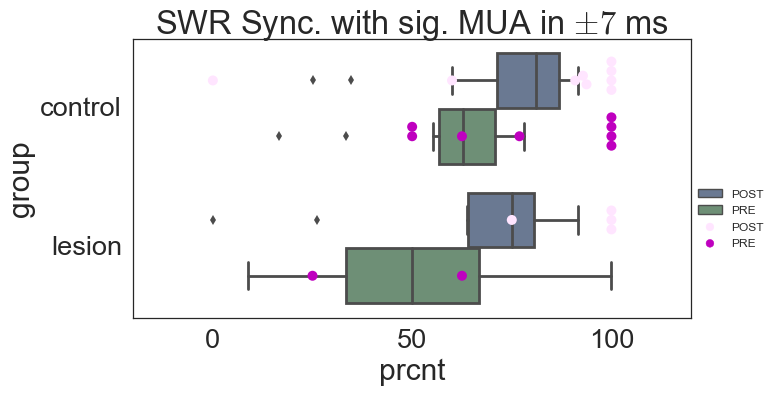

In [155]:
syncPrcntSig = pd.DataFrame([],columns=['prcnt','session','group','event'])
syncLag = 0.0075
lst = [cntListSig_pre,cntListSig_post,lesListSig_pre,lesListSig_post]
sess = ['PRE','POST','PRE','POST']
grp  = ['control','control','lesion','lesion'] 
for idx,pthLst in enumerate(lst):
    for ccFile in pthLst:
        dayList = pkl.load(open(ccFile,'rb'))
        for dic in dayList:
            swrs = dic['swr']
            fgbs = dic['fgb']
            syncSWR = swrs[np.abs(swrs)<syncLag]
            syncFGB = fgbs[np.abs(fgbs)<syncLag]
            if syncFGB.size+syncSWR.size:
                syncPrcntSig = syncPrcntSig.append(pd.DataFrame([[1e2*syncSWR.size/(syncFGB.size+syncSWR.size),sess[idx],grp[idx],'SWR']],columns=['prcnt','session','group','event']),ignore_index=True)
                syncPrcntSig = syncPrcntSig.append(pd.DataFrame([[1e2*syncFGB.size/(syncFGB.size+syncSWR.size),sess[idx],grp[idx],'FGB']],columns=['prcnt','session','group','event']),ignore_index=True)
'''
for ccFile in cntListPlus:
    dayList = pkl.load(open(ccFile,'rb'))
    for dic in dayList:
        swrs = dic['swr']
        fgbs = dic['fgb']
        syncSWR = swrs[np.abs(swrs)<syncLag]
        syncFGB = fgbs[np.abs(fgbs)<syncLag]
        syncPrcnt = syncPrcnt.append(pd.DataFrame([[1e2*syncSWR.size/(fgbs.size+swrs.size),'control','SWR']],columns=['prcnt','group','event']),ignore_index=True)
        syncPrcnt = syncPrcnt.append(pd.DataFrame([[1e2*syncFGB.size/(fgbs.size+swrs.size),'control','FGB']],columns=['prcnt','group','event']),ignore_index=True)
        '''
####################
f,ax = pl.subplots(1,1,figsize=[10,5])
#sns.violinplot(x='group',y='prcnt',data=syncPrcnt,inner='stick',split=True,hue='event',order=['control','lesion'])
sns.boxplot(x='prcnt',y='group',data=syncPrcnt[syncPrcnt.event=='SWR'],hue='session',orient='h',order=['control','lesion'],hue_order=['POST','PRE'],saturation=0.4,fliersize=7,ax=ax)
sns.swarmplot(y='group',x='prcnt',data=syncPrcntSig[syncPrcntSig.event=='SWR'],split=True,hue='session',size=10,order=['control','lesion'],hue_order=['POST','PRE'],color='m')
ax.set_title('SWR Sync. with sig. MUA in $\pm 7$ ms')
ax.legend(fontsize=12,bbox_to_anchor=(1.15, 0.5))
pl.xticks([0,50,100])
f.savefig('/home/chenani/ownCloud/Plots/Lesion-Project/significant-SWR-sycronized-percentile.pdf')

In [161]:
swrPREprcnt= fgRipp_percentiles[(fgRipp_percentiles.group=='lesion')&(fgRipp_percentiles.session=='PRE')].SWR_prcnt.as_matrix()
swrPOSTprcnt = fgRipp_percentiles[(fgRipp_percentiles.group=='lesion')&(fgRipp_percentiles.session=='POST')].SWR_prcnt.as_matrix()
swrPREprcnt = fgRipp_percentiles[(fgRipp_percentiles.group=='control')&(fgRipp_percentiles.session=='PRE')].SWR_prcnt.as_matrix()
swrPOSTprcnt = fgRipp_percentiles[(fgRipp_percentiles.group=='control')&(fgRipp_percentiles.session=='POST')].SWR_prcnt.as_matrix()

In [157]:
dens = sm.nonparametric.KDEUnivariate(swrPREprcnt)
dens.fit('gau', bw='silverman', gridsize=300, cut=1, clip=[0,100])

In [127]:
swrPrcnt

,prcnt,group,session


In [173]:
ranksums(swrPREprcnt,a)

RanksumsResult(statistic=-2.4696199467069384, pvalue=0.013525666549104995)

In [98]:
fgRipp_percentiles


,animal,date,group,session,FG_prcnt,FG_sws,FG_rem,SWR_prcnt,SWR_sws,SWR_rem
0,Rat3837,day1,lesion,PRE,52.943598,53.327496,52.566096,47.056402,46.672504,47.433904
1,Rat3837,day1,lesion,POST,52.932442,55.681818,47.751606,47.067558,44.318182,52.248394
2,Rat3837,day2,lesion,POST,76.463878,78.766643,73.763621,23.536122,21.233357,26.236379
3,Rat3837,day2,lesion,PRE,46.083597,50.034364,41.954023,53.916403,49.965636,58.045977
4,Rat3837,day3,lesion,PRE,75.686431,71.917192,78.673324,24.313569,28.082808,21.326676
5,Rat3837,day3,lesion,POST,72.560733,73.044218,72.113943,27.439267,26.955782,27.886057
6,Rat3837,day4,lesion,PRE,99.600436,99.666296,99.476440,0.399564,0.333704,0.523560
7,Rat3837,day4,lesion,POST,98.517110,97.888889,98.843262,1.482890,2.111111,1.156738
8,Rat3838,day1,lesion,PRE,70.535714,69.423929,77.570093,11.734694,13.441654,0.934579
9,Rat3838,day1,lesion,POST,76.555024,73.411154,85.401460,14.641148,15.953307,10.948905


In [ ]:
'''for ccFile in cntListPlus:
    dayList = pkl.load(open(ccFile,'rb'))
    for dic in dayList:
        swrs = dic['swr']
        fgbs = dic['fgb']
        if swrs.size+fgbs.size:
            swrPrcnt = swrPrcnt.append(pd.DataFrame([[1e2*swrs.size/(fgbs.size+swrs.size),'control','More than 3 Units']],columns=['prcnt','group','popType']),ignore_index=True)
for ccFile in lesListMinus:
    dayList = pkl.load(open(ccFile,'rb'))
    for dic in dayList:
        swrs = dic['swr']
        fgbs = dic['fgb']
        if swrs.size+fgbs.size:
            swrPrcnt = swrPrcnt.append(pd.DataFrame([[1e2*swrs.size/(fgbs.size+swrs.size),'lesion','Less than 3 Units']],columns=['prcnt','group','popType']),ignore_index=True)
for ccFile in cntListMinus:
    dayList = pkl.load(open(ccFile,'rb'))
    for dic in dayList:
        swrs = dic['swr']
        fgbs = dic['fgb']
        if swrs.size+fgbs.size:
            swrPrcnt = swrPrcnt.append(pd.DataFrame([[1e2*swrs.size/(fgbs.size+swrs.size),'control','Less than 3 Units']],columns=['prcnt','group','popType']),ignore_index=True)
'''